In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Adaline(object):
   
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * np.dot(X.T, errors)
            self.w_[0] += self.eta * errors.sum()
            e = (errors**2).sum() / 2.0
            self.errors_.append(e)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


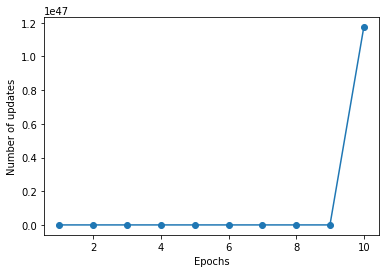

In [7]:
df = pd.read_csv('iris.data' , header=None)
df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)


X = df.iloc[0:100, [0, 2]].values
a = Adaline(eta=0.1, n_iter=10)


a.fit(X, y)

plt.plot(range(1, len(a.errors_)+1), a.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()

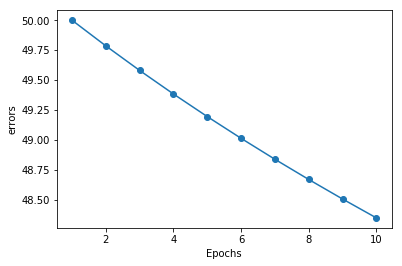

In [14]:
ad = Adaline(eta=0.00001, n_iter=10)


ad.fit(X, y)

plt.plot(range(1, len(ad.errors_)+1), ad.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('errors')
plt.show()